# A Naive approach of using Isolation Forest on server data 1

Importing necessary libraries
- Pandas for dataframe
- matplotlib for plotting data
- skelrean for importing isolation forest module from scipy library
- datetime for faking timestamp
- plotly for dynamically looking/plotting at the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from datetime import datetime
import plotly.express as px

In [31]:
# server1 = pd.read_csv('system_1.csv')     
# print(server1[['timestamp','load-1m', 'sys-thermal', 'cpu-user']].head())
# print()
# print()

   timestamp  load-1m  sys-thermal  cpu-user
0          0     0.22         1.60    0.0405
1         30     0.26         0.00    0.0475
2         60     0.16         0.00    0.0260
3         90     0.16         0.00    0.0315
4        120     0.10         1.55    0.0270




In [32]:
server1 = pd.read_csv('system_1.csv')                                             # read the csv file
start_time = datetime(2023, 10, 29, 0, 0, 0)                                      # lets assume data starts coming from this time
time_range = pd.date_range(start=start_time, periods=len(server1), freq='30S')   
server1['timestamp'] = time_range                                                 # adding time to data after every 30 from that date
print(server1)

                timestamp  load-1m  load-5m  load-15m  sys-mem-swap-total   
0     2023-10-29 00:00:00     0.22     0.18      0.18         16953372672  \
1     2023-10-29 00:00:30     0.26     0.19      0.18         16953372672   
2     2023-10-29 00:01:00     0.16     0.17      0.18         16953372672   
3     2023-10-29 00:01:30     0.16     0.17      0.18         16953372672   
4     2023-10-29 00:02:00     0.10     0.15      0.17         16953372672   
...                   ...      ...      ...       ...                 ...   
85744 2023-11-27 18:32:00     0.17     0.13      0.10         16953372672   
85745 2023-11-27 18:32:30     0.16     0.13      0.10         16953372672   
85746 2023-11-27 18:33:00     0.10     0.12      0.09         16953372672   
85747 2023-11-27 18:33:30     0.06     0.11      0.09         16953372672   
85748 2023-11-27 18:34:00     0.18     0.13      0.10         16953372672   

       sys-mem-swap-free  sys-mem-free  sys-mem-cache  sys-mem-buffered   


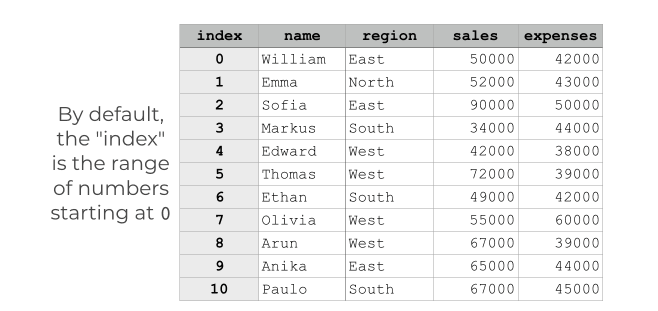
- By default, if we don’t specify another index in some way, every DataFrame has an index like this.
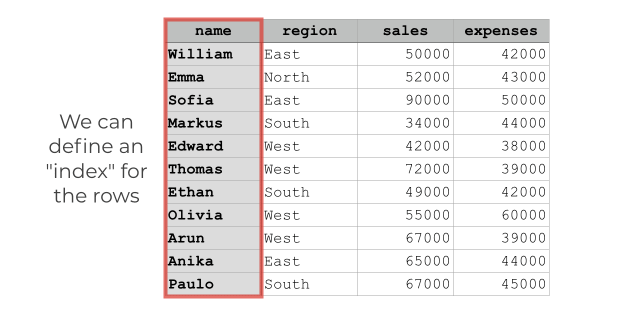
- Once we do this, we can reference rows by the index value (i.e., the “label”) associated with the particular row.
*Another Example - 
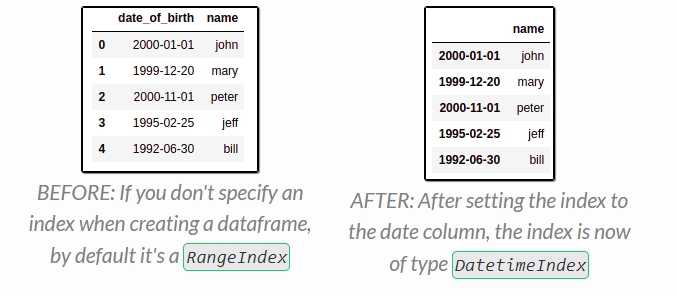
[Dataframe.set_index(keys, ....) Documentation Here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
Here, 
- 'timestamp': This specifies that the column named 'timestamp' in the DataFrame should be used as the new index.
- inplace: True, Whether to modify the DataFrame rather than creating a new one.

In [33]:
server1.set_index('timestamp', inplace=True)

# taking the 'Hourly' mean of data to put on the timestamp column of another dataframe 'resampled_server1'
resampled_server1 = server1.resample('H').mean()

# Resetting the index to move the timestamp back to a column
resampled_server1.reset_index(inplace=True)

resampled_server1

,timestamp,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,...,sys-thermal,disk-io-time,disk-bytes-read,disk-bytes-written,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up
0,2023-10-29 00:00:00,0.150083,0.149000,0.145417,1.695337e+10,1.695337e+10,2.026587e+09,1.033222e+10,1.937987e+09,1.530991e+10,...,0.525833,0.010185,0.000000,45378.560000,0.000000,3.472917,0.012200,0.048671,0.086371,2.0
1,2023-10-29 01:00:00,0.144333,0.133750,0.110917,1.695337e+10,1.695337e+10,1.982151e+09,1.036875e+10,1.938580e+09,1.530303e+10,...,0.532500,0.007430,0.000000,28617.386667,0.000000,1.637917,0.010204,0.041737,0.064687,2.0
2,2023-10-29 02:00:00,0.143917,0.136750,0.119167,1.695337e+10,1.695337e+10,2.080239e+09,1.041987e+10,1.939482e+09,1.545489e+10,...,0.677083,0.010922,0.000000,209440.397491,0.000000,2.365831,0.012417,0.046783,0.087192,2.0
3,2023-10-29 03:00:00,0.144917,0.137000,0.125167,1.695337e+10,1.695337e+10,2.023736e+09,1.046703e+10,1.940305e+09,1.544724e+10,...,0.516250,0.006855,1.706667,31976.168716,0.000417,1.582507,0.010292,0.043646,0.070688,2.0
4,2023-10-29 04:00:00,0.170000,0.155000,0.117083,1.695337e+10,1.695337e+10,1.943812e+09,1.050751e+10,1.941129e+09,1.540867e+10,...,0.515000,0.009008,0.000000,24741.546667,0.000000,2.118750,0.010737,0.037446,0.063817,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2023-11-27 14:00:00,0.162500,0.146167,0.099500,1.695337e+10,1.695337e+10,6.651938e+09,7.018213e+09,1.357927e+09,1.560548e+10,...,0.578750,0.010735,370.346667,259809.280000,0.003333,3.323750,0.012317,0.042158,0.078746,2.0
711,2023-11-27 15:00:00,0.171250,0.164083,0.159667,1.695337e+10,1.695337e+10,6.573230e+09,7.009718e+09,1.358919e+09,1.551453e+10,...,0.618750,0.006280,1.706667,25982.293333,0.000417,1.448750,0.009350,0.038688,0.072933,2.0
712,2023-11-27 16:00:00,0.150000,0.132833,0.102250,1.695337e+10,1.695337e+10,6.526691e+09,7.039467e+09,1.359487e+09,1.549901e+10,...,0.690833,0.008190,17.066667,28765.866667,0.004167,1.735833,0.010225,0.039363,0.071383,2.0
713,2023-11-27 17:00:00,0.168333,0.160167,0.141000,1.695337e+10,1.695337e+10,6.450238e+09,7.087261e+09,1.360245e+09,1.547238e+10,...,0.651250,0.008882,17.066667,38588.038367,0.004167,2.118383,0.012421,0.048117,0.098113,2.0


In [34]:
server1.info()
# Now, every data is either float or int and there is no null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85749 entries, 2023-10-29 00:00:00 to 2023-11-27 18:34:00
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   load-1m                  85749 non-null  float64
 1   load-5m                  85749 non-null  float64
 2   load-15m                 85749 non-null  float64
 3   sys-mem-swap-total       85749 non-null  int64  
 4   sys-mem-swap-free        85749 non-null  int64  
 5   sys-mem-free             85749 non-null  int64  
 6   sys-mem-cache            85749 non-null  int64  
 7   sys-mem-buffered         85749 non-null  int64  
 8   sys-mem-available        85749 non-null  int64  
 9   sys-mem-total            85749 non-null  int64  
 10  sys-fork-rate            85749 non-null  float64
 11  sys-interrupt-rate       85749 non-null  float64
 12  sys-context-switch-rate  85749 non-null  float64
 13  sys-thermal              85749 non-null  

* [Turn thr hour into datetime format](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html)

In [35]:
resampled_server1['hour'] = resampled_server1.timestamp.dt.hour

- Added a column named weekday where the data shows on a weekday basis

In [36]:
resampled_server1['weekday'] = pd.Categorical(resampled_server1.timestamp.dt.strftime('%A'), 
                                              categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## How every column looks on a weekly basis

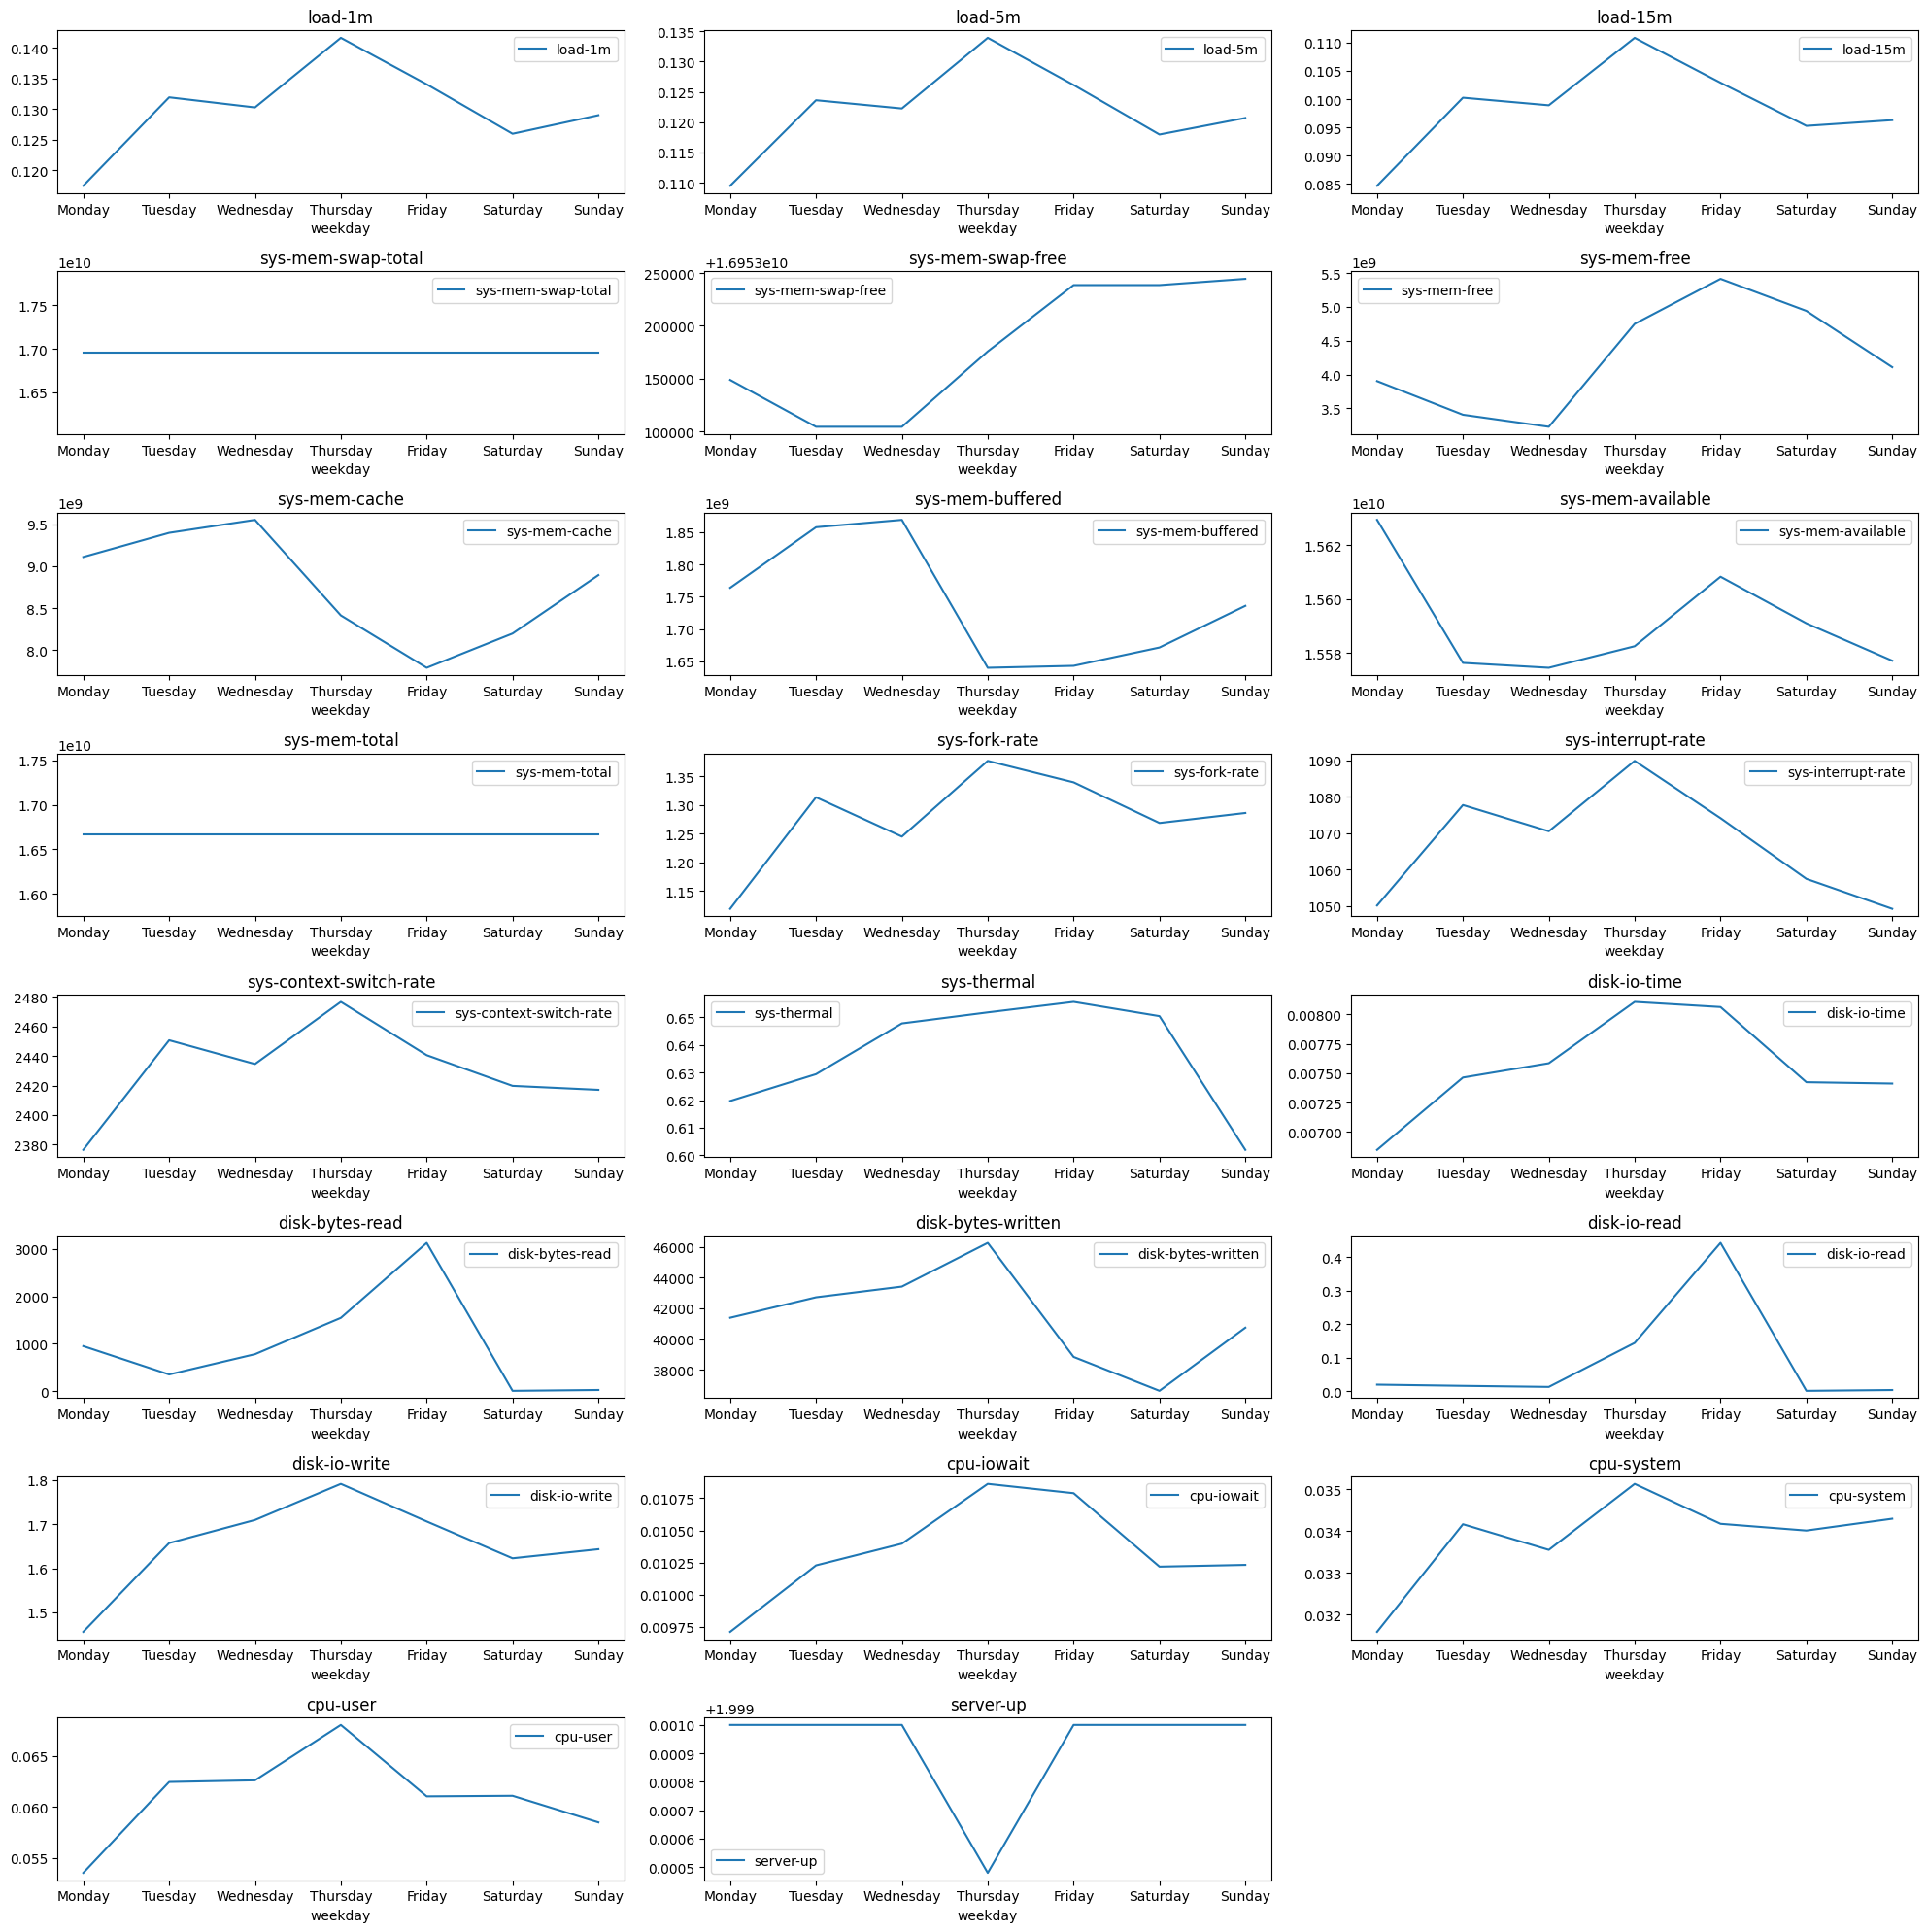

In [37]:
cols = ['load-1m', 'load-5m', 'load-15m','sys-mem-swap-total', 'sys-mem-swap-free', 'sys-mem-free','sys-mem-cache', 'sys-mem-buffered',
        'sys-mem-available','sys-mem-total', 'sys-fork-rate', 'sys-interrupt-rate', 'sys-context-switch-rate',
       'sys-thermal', 'disk-io-time', 'disk-bytes-read', 'disk-bytes-written',
       'disk-io-read', 'disk-io-write', 'cpu-iowait', 'cpu-system', 'cpu-user',
       'server-up']
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 20))
axes_flat = axes.flatten()
for i, var in enumerate(cols):
    # Group by 'weekday', calculate mean, and plot
    resampled_server1[[var, 'weekday']].groupby('weekday').mean().plot(ax=axes_flat[i])
    axes_flat[i].set_title(var)

# Hide the empty subplots
for i in range(len(cols), 24):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

## How every column looks on a daily basis

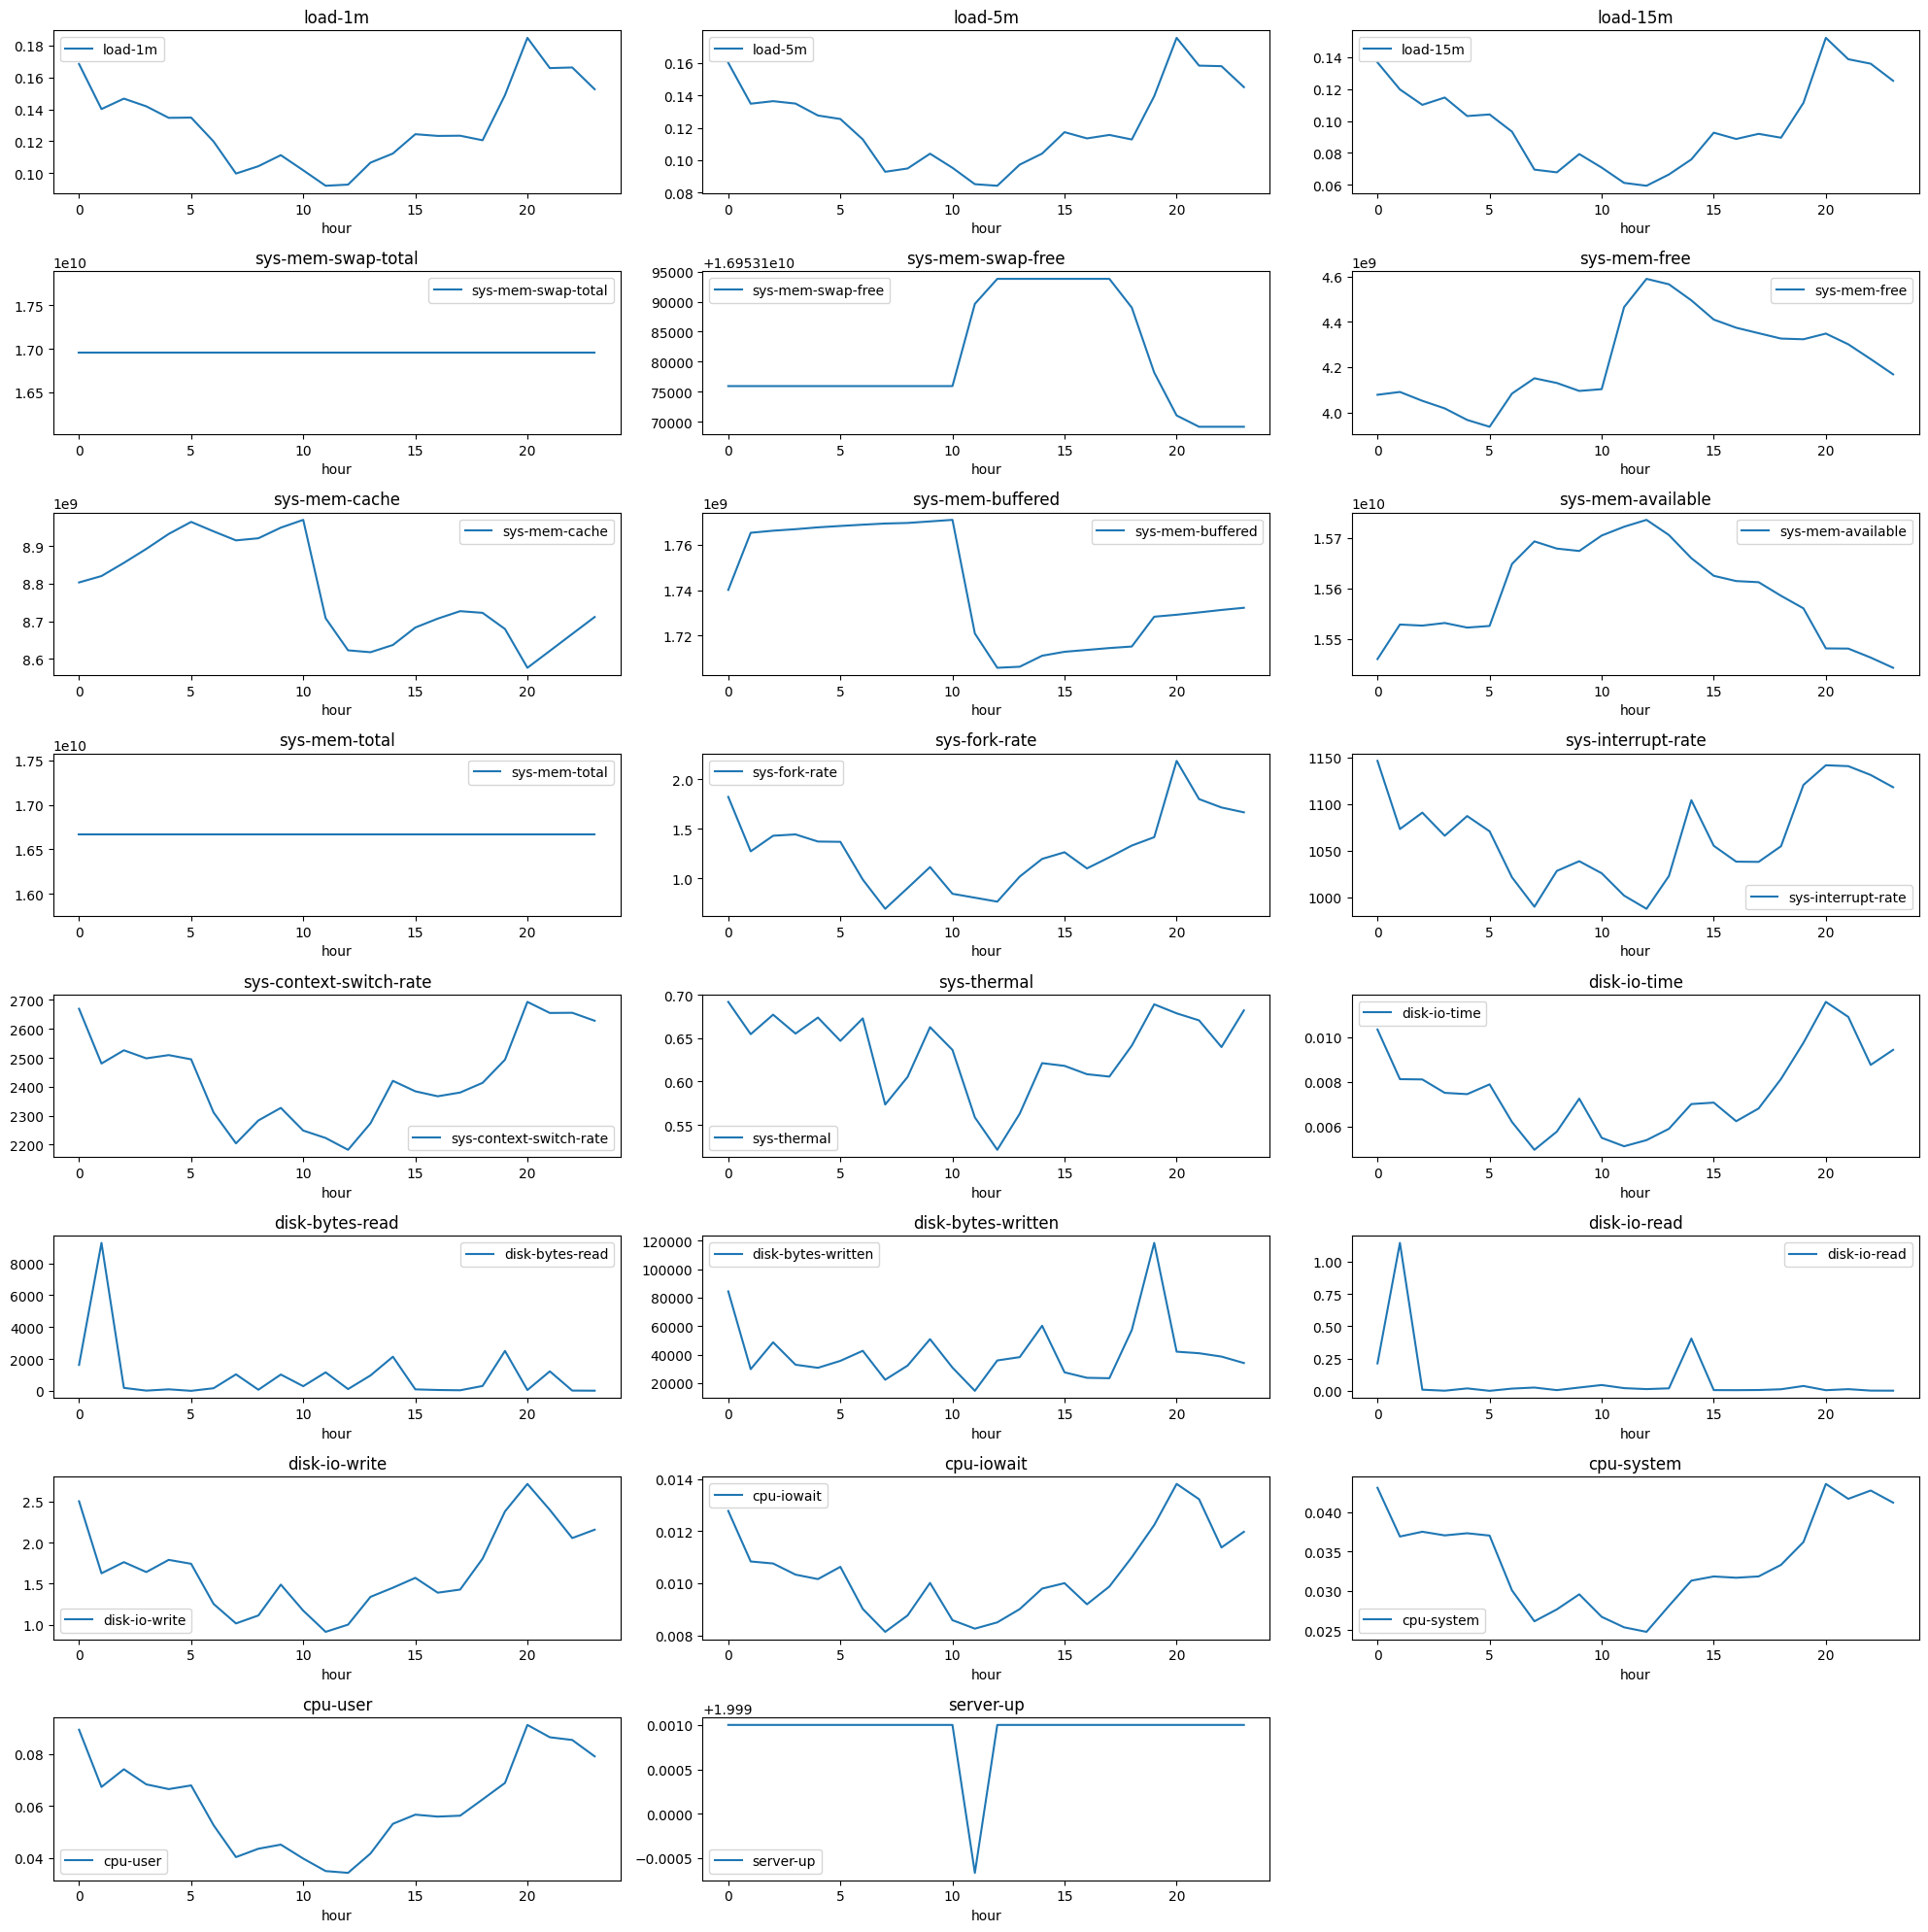

In [38]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 20))
axes_flat = axes.flatten()
for i, var in enumerate(cols):
    # Group by 'weekday', calculate mean, and plot
    resampled_server1[[var, 'hour']].groupby('hour').mean().plot(ax=axes_flat[i])
    axes_flat[i].set_title(var)

# Hide the empty subplots
for i in range(len(cols), 24):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='hour'>

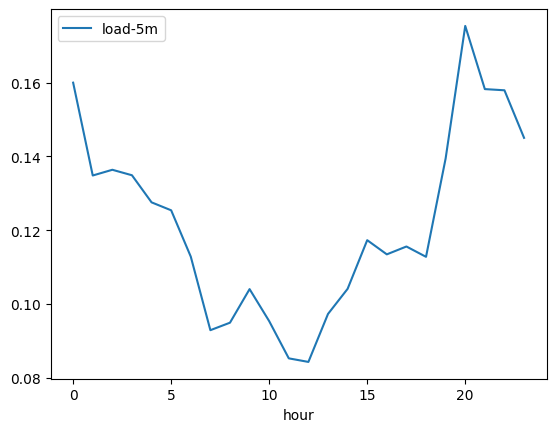

In [39]:
# same graph 
resampled_server1[['load-5m', 'hour']].groupby('hour').mean().plot()

# For a better view, I used the plotly.express library

In [40]:
fig = px.line(resampled_server1.reset_index(), x = 'timestamp', y='load-5m', title = 'server_data')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## To check if the 'load-5m' column has any pattern like on daily basis of the week
## example: the mean of every Friday and the mean of every Sunday shows same pattern

<Axes: xlabel='hour'>

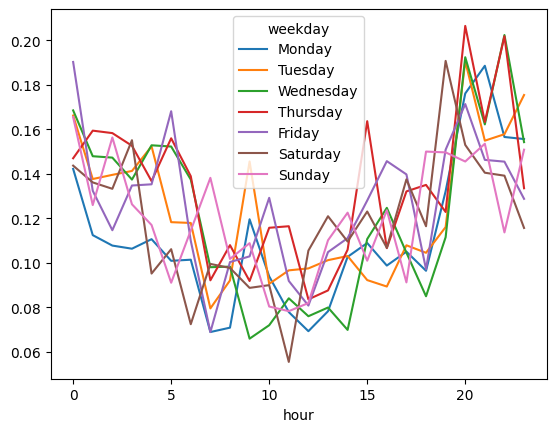

In [41]:
resampled_server1.groupby(['hour', 'weekday']).mean()['load-5m'].unstack().plot()

<Axes: xlabel='hour'>

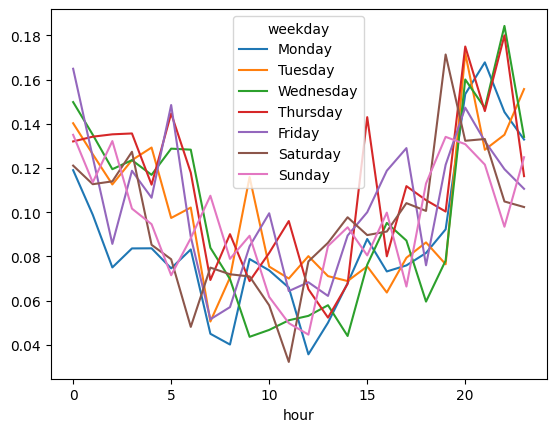

In [42]:
resampled_server1.groupby(['hour', 'weekday']).mean()['load-15m'].unstack().plot()

<Axes: xlabel='hour'>

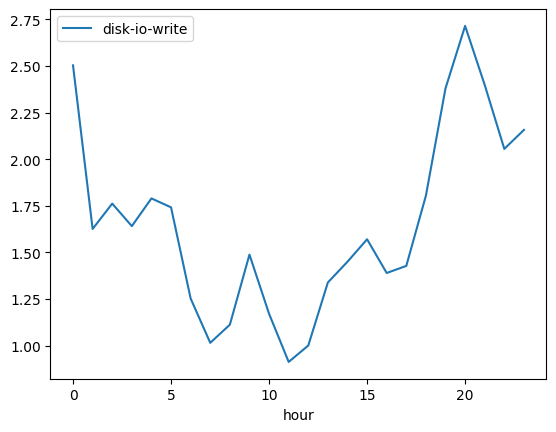

In [43]:
resampled_server1[['disk-io-write', 'hour']].groupby('hour').mean().plot()

In [44]:
fig = px.line(resampled_server1.reset_index(), x = 'timestamp', y='load-1m', title = 'server_data')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

- Turning the 'day' column as datetime format as we want to work with only int and float data

In [45]:
resampled_server1['day'] = resampled_server1.timestamp.dt.weekday

In [46]:
resampled_server1

,timestamp,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,...,disk-bytes-written,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up,hour,weekday,day
0,2023-10-29 00:00:00,0.150083,0.149000,0.145417,1.695337e+10,1.695337e+10,2.026587e+09,1.033222e+10,1.937987e+09,1.530991e+10,...,45378.560000,0.000000,3.472917,0.012200,0.048671,0.086371,2.0,0,Sunday,6
1,2023-10-29 01:00:00,0.144333,0.133750,0.110917,1.695337e+10,1.695337e+10,1.982151e+09,1.036875e+10,1.938580e+09,1.530303e+10,...,28617.386667,0.000000,1.637917,0.010204,0.041737,0.064687,2.0,1,Sunday,6
2,2023-10-29 02:00:00,0.143917,0.136750,0.119167,1.695337e+10,1.695337e+10,2.080239e+09,1.041987e+10,1.939482e+09,1.545489e+10,...,209440.397491,0.000000,2.365831,0.012417,0.046783,0.087192,2.0,2,Sunday,6
3,2023-10-29 03:00:00,0.144917,0.137000,0.125167,1.695337e+10,1.695337e+10,2.023736e+09,1.046703e+10,1.940305e+09,1.544724e+10,...,31976.168716,0.000417,1.582507,0.010292,0.043646,0.070688,2.0,3,Sunday,6
4,2023-10-29 04:00:00,0.170000,0.155000,0.117083,1.695337e+10,1.695337e+10,1.943812e+09,1.050751e+10,1.941129e+09,1.540867e+10,...,24741.546667,0.000000,2.118750,0.010737,0.037446,0.063817,2.0,4,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2023-11-27 14:00:00,0.162500,0.146167,0.099500,1.695337e+10,1.695337e+10,6.651938e+09,7.018213e+09,1.357927e+09,1.560548e+10,...,259809.280000,0.003333,3.323750,0.012317,0.042158,0.078746,2.0,14,Monday,0
711,2023-11-27 15:00:00,0.171250,0.164083,0.159667,1.695337e+10,1.695337e+10,6.573230e+09,7.009718e+09,1.358919e+09,1.551453e+10,...,25982.293333,0.000417,1.448750,0.009350,0.038688,0.072933,2.0,15,Monday,0
712,2023-11-27 16:00:00,0.150000,0.132833,0.102250,1.695337e+10,1.695337e+10,6.526691e+09,7.039467e+09,1.359487e+09,1.549901e+10,...,28765.866667,0.004167,1.735833,0.010225,0.039363,0.071383,2.0,16,Monday,0
713,2023-11-27 17:00:00,0.168333,0.160167,0.141000,1.695337e+10,1.695337e+10,6.450238e+09,7.087261e+09,1.360245e+09,1.547238e+10,...,38588.038367,0.004167,2.118383,0.012421,0.048117,0.098113,2.0,17,Monday,0


### We will be using Isolation Forest on df_final dataframe, where 'timestamp' and 'weekday' column is not present

In [47]:
df_final = resampled_server1.drop(['timestamp', 'weekday'], axis=1 )

- 'contamination=.008, max_samples=0.8, n_estimators=1000' these are the hyperparameter that can be tuned
- [Learn more about it here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

#Training the model

In [48]:
model = IsolationForest(contamination=.008, max_samples=0.8, n_estimators=1000)
model.fit(df_final.values)

IsolationForest(contamination=0.008, max_samples=0.8, n_estimators=1000)

### Adding a column to resampled_server1 dataframe 'outliers' where 
- Model predicts a value on the df_final data frame, it returns -1 if that point is an outlier, otherwise 1
- If Model assume -1, we put 'Yes' otherwise 'No' on the 'outliers' column of resampled_server1 dataframe

In [49]:
resampled_server1['outliers'] = pd.Series(model.predict(df_final.values)).apply(lambda x: 'yes' if (x == -1) else 'no')

In [50]:
resampled_server1.query('outliers=="yes"')

,timestamp,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,...,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up,hour,weekday,day,outliers
256,2023-11-08 16:00:00,0.224500,0.225833,0.183167,1.695337e+10,1.695284e+10,2.397177e+09,1.003493e+10,2.050598e+09,1.552145e+10,...,0.000417,6.898358,0.029092,0.048038,0.105392,2.00,16,Wednesday,2,yes
443,2023-11-16 11:00:00,0.147000,0.169000,0.172333,1.695337e+10,1.695325e+10,1.220442e+10,2.932832e+09,6.424507e+08,1.586798e+10,...,0.586184,0.908983,0.010166,0.024305,0.061020,1.95,11,Thursday,3,yes
445,2023-11-16 13:00:00,0.099417,0.093833,0.057667,1.695337e+10,1.695337e+10,1.533094e+10,6.258510e+08,1.932739e+08,1.594403e+10,...,0.539583,0.988333,0.012317,0.023517,0.029729,2.00,13,Thursday,3,yes
446,2023-11-16 14:00:00,0.117917,0.104667,0.054167,1.695337e+10,1.695337e+10,1.452854e+10,9.897040e+08,3.212162e+08,1.573626e+10,...,11.301667,3.050833,0.020017,0.039275,0.080092,2.00,14,Thursday,3,yes
456,2023-11-17 00:00:00,0.211000,0.200500,0.183833,1.695337e+10,1.695337e+10,1.350394e+10,1.733597e+09,4.182038e+08,1.562476e+10,...,6.220833,1.614583,0.016383,0.038350,0.120567,2.00,0,Friday,4,yes
457,2023-11-17 01:00:00,0.130417,0.130333,0.131917,1.695337e+10,1.695337e+10,1.265446e+10,1.734436e+09,1.151239e+09,1.586886e+10,...,33.720417,0.745417,0.038462,0.025175,0.029600,2.00,1,Friday,4,yes


# Plotting the outliers points using Plotly

In [53]:
# To Plot Predictions
fig = px.scatter(resampled_server1, x='timestamp', y='load-1m', color='outliers', hover_data=['weekday', 'hour'])
fig.update_xaxes(rangeslider_visible = True,)
fig.show()

# Plotting using more than one variables (columns/features)

In [52]:
# To Plot Predictions
fig = px.scatter(resampled_server1, x='timestamp',y=['load-1m', 'load-5m', 'load-15m', 'server-up'], color='outliers', hover_data=['weekday', 'hour'])
fig.update_xaxes(rangeslider_visible = True,)
fig.show()